TODO:

- Figure that shows distribution of words based on count

DONE:
- Check rows where all emotions labels are the same
- Remove rows with NaN values
- Remove rows with descriptions 'test' or 'stuff'
- Check rows where description is one word
- Ask Dr. K what he would like me to do in entries where the robot did nothing
- Mean/std of each of the 8 emotion pairs
- Count of word tokens in the descriptions
- Average description length (in words)
- Size of vocabulary for descriptions (with lowercase, lemmatization and checking for filtering for alpha characters)
- A nice figure that shows the mean/std of emotion pairs

In [43]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/slimlab/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 150)

In [5]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

# Data Cleaning Functions

In [6]:
def find_rows_with_same_emotion_labels(data):
    indices = []
    for index, row in data.iterrows():
        if row['Interst/Alarm'] == row['Confusion/Understanding'] == row['Frusteration/Relief'] == row['Sorrow/Joy'] == row['Anger/Gratitude'] == row['Fear/Hope'] == row['Boredom/Surprise'] == row['Disgust/Desire']:
            print(index, '\n', row)
            indices.append(index)
    return indices

In [7]:
def drop_row(data, index):
    return data.drop(index, axis=0)

In [8]:
def find_singleton_descriptions(data):
    indices = []
    for index, row in data.iterrows():
        if len(nltk.word_tokenize(str(row['Description']))) == 1:
            print(index, '\n', row['Timestamp'], '\n', row['Description'])
        indices.append(index)

In [9]:
def find_NaN_values(data):
    return np.where(pd.isnull(data))

In [10]:
def find_empty_values(data):
    return np.where(data.applymap(lambda x: x == ''))

In [11]:
def find_rows_with_description(data, description):
    test_rows = data[data['Description']==description].index.tolist()
    return test_rows

# Data Analysis Functions

In [12]:
def mean_emotion_pairs(data):
    return data[["Interst/Alarm", "Confusion/Understanding", "Frusteration/Relief", "Sorrow/Joy", "Anger/Gratitude", "Fear/Hope", "Boredom/Surprise", "Disgust/Desire"]].mean()

In [13]:
def std_emotion_pairs(data):
    return data[["Interst/Alarm", "Confusion/Understanding", "Frusteration/Relief", "Sorrow/Joy", "Anger/Gratitude", "Fear/Hope", "Boredom/Surprise", "Disgust/Desire"]].std()

In [14]:
def graph_means_stds(means, stds):

    ind = np.arange(8)
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind, means, width, color='blue', label='Means')
    ax.barh(ind + width, stds, width, color='darkorange', label='STDs')

    ax.set(yticks=ind + width, yticklabels=['Interest/Alarm', 'Confusion/Understanding', 'Frustration/Relief', 'Sorrow/Joy', 'Anger/Gratitude', 'Fear/Hope', 'Boredom/Surprise', 'Disgust/Desire'], ylim=[2*width - 1, 8])
    ax.legend()

    plt.show()

In [15]:
# lemmatization, lowercase, remove non alpha, remove non-english, remove numbers and stopword removal
rejected_content = []
def preprocess(row):
    filtered_content = []
    for token in nltk.word_tokenize(row['Description']):
        token = lemmatizer.lemmatize(token).lower()
        if token.isalpha():
            filtered_content.append(token) 
        
    return filtered_content

In [16]:
def analyze_descriptions(data): 
    data['Description_Tokenized'] = data.apply(lambda row: preprocess(row), axis=1)
    data['Description_Count'] = data['Description'].apply(lambda description: len(nltk.word_tokenize(description.lower())))

In [17]:
def count_total_tokens(data):
    return data['Description_Count'].sum()

In [18]:
def average_description_length(data):
    return data['Description_Count'].mean()

In [19]:
def vocab(data):
    return set(list(np.concatenate(data['Description_Tokenized'].values).flat))

In [20]:
def vocab_size(data):
    return len(set(list(np.concatenate(data['Description_Tokenized'].values).flat)))

In [72]:
cozmo_data = pd.read_csv('responses_cozmo copy.csv')

In [73]:
cozmo_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617917e+09,It went to investigate a thing it saw,1,1,3,3,3,4,4,5
1,1.619714e+09,drove forward for a bit and then turned to his...,2,3,3,3,3,3,3,3
2,1.619714e+09,"just drove forward, made a little sound at the...",2,3,3,3,3,3,3,3
3,1.619714e+09,drove forward fairly quickly and then turned t...,1,3,3,3,4,4,3,4
4,1.619714e+09,looked down squinted eyes and then looked forw...,2,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
648,1.637355e+09,At first the robot tilted thier head up and sa...,1,2,3,1,3,3,3,3
649,1.637355e+09,The robot first moved straight with a slight r...,1,2,1,3,1,2,3,1
650,1.637355e+09,"At first, the robot raised their head and hand...",1,5,5,5,5,5,5,3
651,1.637355e+09,"The robot turned around nearly 180 degrees, lo...",3,4,3,1,3,1,2,3


# Clean Data

In [74]:
len(cozmo_data)

653

In [65]:
cozmo_data = cozmo_data.drop_duplicates(subset=['Timestamp'])
cozmo_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617917e+09,It went to investigate a thing it saw,1,1,3,3,3,4,4,5
1,1.619714e+09,drove forward for a bit and then turned to his...,2,3,3,3,3,3,3,3
2,1.619714e+09,"just drove forward, made a little sound at the...",2,3,3,3,3,3,3,3
3,1.619714e+09,drove forward fairly quickly and then turned t...,1,3,3,3,4,4,3,4
4,1.619714e+09,looked down squinted eyes and then looked forw...,2,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
648,1.637355e+09,At first the robot tilted thier head up and sa...,1,2,3,1,3,3,3,3
649,1.637355e+09,The robot first moved straight with a slight r...,1,2,1,3,1,2,3,1
650,1.637355e+09,"At first, the robot raised their head and hand...",1,5,5,5,5,5,5,3
651,1.637355e+09,"The robot turned around nearly 180 degrees, lo...",3,4,3,1,3,1,2,3


In [57]:
len(find_rows_with_same_emotion_labels(cozmo_data))

7 
 Timestamp                                                        1.61971e+09
Description                drove forward a bit and then looked down. Repl...
Interst/Alarm                                                              3
Confusion/Understanding                                                    3
Frusteration/Relief                                                        3
Sorrow/Joy                                                                 3
Anger/Gratitude                                                            3
Fear/Hope                                                                  3
Boredom/Surprise                                                           3
Disgust/Desire                                                             3
Name: 7, dtype: object
14 
 Timestamp                               1.61972e+09
Description                moved forward and turned
Interst/Alarm                                     3
Confusion/Understanding                   

55

In [58]:
cozmo_data = drop_row(cozmo_data, 143)

In [59]:
find_NaN_values(cozmo_data)

(array([35]), array([1]))

In [60]:
cozmo_data.iloc[37]

Timestamp                                                        1.62093e+09
Description                Slight moved lift. Eyes made intrigued express...
Interst/Alarm                                                              2
Confusion/Understanding                                                    2
Frusteration/Relief                                                        3
Sorrow/Joy                                                                 3
Anger/Gratitude                                                            3
Fear/Hope                                                                  3
Boredom/Surprise                                                           2
Disgust/Desire                                                             3
Name: 40, dtype: object

In [61]:
cozmo_data = drop_row(cozmo_data, 37)

In [62]:
find_empty_values(cozmo_data)

(array([], dtype=int64), array([], dtype=int64))

In [63]:
find_singleton_descriptions(cozmo_data)

103 
 1633373656.0610828 
 interest
104 
 1633373733.4669967 
 interest


In [64]:
find_rows_with_description(cozmo_data, 'test')

[]

# Analyze Data

In [50]:
means_cozmo = mean_emotion_pairs(cozmo_data)
means_cozmo

Interst/Alarm              2.413417
Confusion/Understanding    2.809672
Frusteration/Relief        2.929797
Sorrow/Joy                 2.918877
Anger/Gratitude            2.970359
Fear/Hope                  3.076443
Boredom/Surprise           3.078003
Disgust/Desire             3.151326
dtype: float64

In [51]:
stds_cozmo = std_emotion_pairs(cozmo_data)
stds_cozmo

Interst/Alarm              1.042417
Confusion/Understanding    0.980099
Frusteration/Relief        0.741452
Sorrow/Joy                 0.853102
Anger/Gratitude            0.682867
Fear/Hope                  0.742940
Boredom/Surprise           0.792642
Disgust/Desire             0.825683
dtype: float64

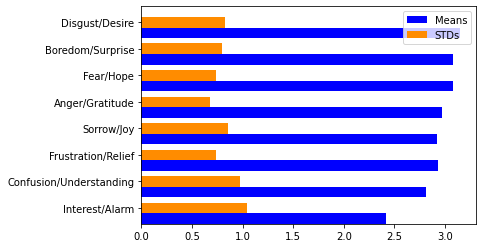

In [52]:
graph_means_stds(means_cozmo.values, stds_cozmo.values)

In [49]:
count_total_tokens(cozmo_data)

KeyError: 'Description_Count'

In [53]:
average_description_length(cozmo_data)

KeyError: 'Description_Count'

In [56]:
vocab(cozmo_data)

{'a',
 'aahm',
 'about',
 'above',
 'abut',
 'ace',
 'acted',
 'action',
 'actually',
 'afraid',
 'after',
 'afterwards',
 'again',
 'ah',
 'ahh',
 'ahhm',
 'alarmed',
 'alert',
 'all',
 'almost',
 'already',
 'alternate',
 'alternated',
 'always',
 'am',
 'an',
 'and',
 'angry',
 'announcing',
 'annoyed',
 'another',
 'anything',
 'appear',
 'appeared',
 'appears',
 'appendage',
 'arm',
 'around',
 'asked',
 'asking',
 'assertive',
 'assertively',
 'associated',
 'at',
 'attention',
 'auditory',
 'aw',
 'away',
 'aww',
 'awww',
 'awwwwwwwww',
 'ayyychemm',
 'back',
 'barely',
 'be',
 'became',
 'because',
 'been',
 'before',
 'behavior',
 'besides',
 'better',
 'between',
 'big',
 'bit',
 'bleh',
 'blink',
 'board',
 'bored',
 'both',
 'boy',
 'brief',
 'bringing',
 'bro',
 'brow',
 'but',
 'by',
 'calmly',
 'came',
 'carry',
 'ceiling',
 'champ',
 'change',
 'charger',
 'charging',
 'cheering',
 'circle',
 'claw',
 'clock',
 'clockwise',
 'closed',
 'closer',
 'come',
 'comfort',
 'c

In [57]:
vocab_size(cozmo_data)

561

In [68]:
misty_data = pd.read_csv('responses_misty copy.csv')

In [69]:
misty_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617741e+09,test,1,1,1,1,1,1,1,1
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...
639,1.637353e+09,Misty raised her hed up and down a few times. ...,5,1,2,3,3,1,5,3
640,1.637353e+09,"At first the robot made heart eyes and said ""a...",1,1,2,5,5,5,5,5
641,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4
642,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4


# Clean Data

In [71]:
len(misty_data)

644

In [75]:
ids = misty_data['Timestamp']

In [77]:
misty_data[ids.isin(ids[ids.duplicated()])]

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
29,1.620934e+09,"Made ""uh"" sound, and moved head up and down.",2,5,4,4,4,4,3,3
30,1.620934e+09,"Made ""uh"" sound, and moved head up and down.",2,5,4,4,4,4,3,3
31,1.620935e+09,Raises head upward at a tilt.,1,2,3,3,3,3,4,3
32,1.620935e+09,Raises head upward at a tilt.,1,2,3,3,3,3,4,3
67,1.630361e+09,turning aroung the head and eyes looked red,3,3,2,3,1,3,3,3
68,1.630361e+09,turning aroung the head and eyes looked red,3,3,2,3,1,3,3,3
86,1.630445e+09,Interesting Robot. Said me Hi.,2,4,4,4,3,3,3,3
87,1.630445e+09,Interesting Robot. Said me Hi.,2,4,4,4,3,3,3,3
88,1.630445e+09,Interesting Robot. Said me Hi.,2,4,4,4,3,3,3,3
91,1.630512e+09,"It began with a display of ""puppy eyes"" and th...",2,1,4,2,2,3,1,4


In [66]:
misty_data = misty_data.drop_duplicates(subset=['Timestamp'])
misty_data

NameError: name 'misty_data' is not defined

In [57]:
len(find_rows_with_same_emotion_labels(misty_data))

76 
 Timestamp                  1630421538.523594
Description                    Glitched out?
Interst/Alarm                              3
Confusion/Understanding                    3
Frusteration/Relief                        3
Sorrow/Joy                                 3
Anger/Gratitude                            3
Fear/Hope                                  3
Boredom/Surprise                           3
Disgust/Desire                             3
Name: 76, dtype: object
89 
 Timestamp                                      1630448369.958236
Description                the robot said hi and nodded its head
Interst/Alarm                                                  3
Confusion/Understanding                                        3
Frusteration/Relief                                            3
Sorrow/Joy                                                     3
Anger/Gratitude                                                3
Fear/Hope                                                    

20

In [45]:
find_NaN_values(misty_data)

(array([], dtype=int64), array([], dtype=int64))

In [46]:
find_empty_values(misty_data)

(array([], dtype=int64), array([], dtype=int64))

In [47]:
find_singleton_descriptions(misty_data)

0 
 1617740862.2616577 
 test
66 
 1630352955.4349294 
 test
95 
 1630515062.8258655 
 confusion
98 
 1630520960.1284945 
 angery
108 
 1630601534.3583376 
 Sadness
121 
 1631134897.8837693 
 confused

122 
 1631134897.8837693 
 confused

123 
 1631134897.8837693 
 confused

124 
 1631134897.8837693 
 confused

125 
 1631134897.8837693 
 confused

126 
 1631134897.8837693 
 confused

139 
 1633113586.5666468 
 f
175 
 1633371901.3289552 
 confusion
177 
 1633372138.351581 
 curiosity 
181 
 1633372445.1713097 
 examination 
185 
 1633372777.6040866 
 awestruk
186 
 1633372844.241636 
 awkward
192 
 1633373363.4952807 
 confusion
194 
 1633373531.5608878 
 confusion
472 
 1635793253.7075171 
 Greeting 
473 
 1635793556.2197733 
 Agreeing 
474 
 1635793657.0961187 
 Welcoming 
475 
 1635793746.7843857 
 Confirming 
477 
 1635794002.9874015 
 Welcoming 


In [48]:
misty_data = drop_row(misty_data, 139)

In [49]:
find_rows_with_description(misty_data, 'test')

[0, 66]

In [50]:
misty_data = drop_row(misty_data, 0)

In [51]:
misty_data = drop_row(misty_data, 66)

# Analyze Data

In [247]:
means_misty = mean_emotion_pairs(misty_data)
means_misty

Interst/Alarm              2.634
Confusion/Understanding    2.952
Frusteration/Relief        2.948
Sorrow/Joy                 3.056
Anger/Gratitude            2.978
Fear/Hope                  3.050
Boredom/Surprise           3.140
Disgust/Desire             3.066
dtype: float64

In [248]:
stds_misty = std_emotion_pairs(misty_data)
stds_misty

Interst/Alarm              1.167377
Confusion/Understanding    1.164650
Frusteration/Relief        0.823804
Sorrow/Joy                 0.913528
Anger/Gratitude            0.833610
Fear/Hope                  0.762011
Boredom/Surprise           1.109442
Disgust/Desire             0.845621
dtype: float64

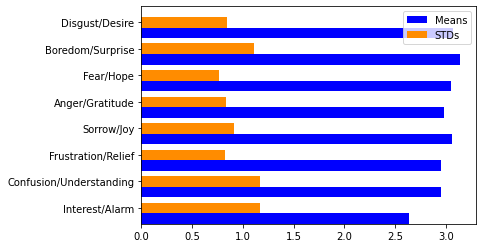

In [249]:
graph_means_stds(means_misty.values, stds_misty.values)

In [235]:
analyze_descriptions(misty_data)
misty_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire,Description_Tokenized,Description_Count
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1,"[confused, and, asking, for, clarification, al...",6
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5,"[his, eyes, half, closed, ,, his, head, tilted...",25
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3,"[eyes, were, half, open, ,, head, tilted, up, ...",15
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3,"[eyes, were, looking, concerned, to, the, left...",23
5,1.619713e+09,one arm moved about halfway up twice head tilt...,3,3,2,2,3,3,2,3,"[one, arm, moved, about, halfway, up, twice, h...",20
...,...,...,...,...,...,...,...,...,...,...,...,...
486,1.635871e+09,the robot said uh twice while moving its head ...,3,1,2,3,3,3,4,4,"[the, robot, said, uh, twice, while, moving, i...",12
487,1.635871e+09,the robot move both of its arms up and down an...,3,4,2,1,3,3,3,4,"[the, robot, move, both, of, its, arms, up, an...",26
488,1.635871e+09,The robot moved its left arm forward slightly ...,4,2,1,1,2,2,3,3,"[the, robot, moved, its, left, arm, forward, s...",15
489,1.635871e+09,The robot looked up and to its right and said aw,1,2,3,3,3,4,2,4,"[the, robot, looked, up, and, to, its, right, ...",11


In [213]:
count_total_tokens(misty_data)

7610

In [214]:
average_description_length(misty_data)

16.365591397849464

In [239]:
vocab(misty_data)

{'!',
 '&',
 "'",
 "''",
 "'ah",
 "'d",
 "'ha",
 "'hi",
 "'hm",
 "'hmm",
 "'s",
 "'toy",
 "'um",
 "'ve",
 '(',
 ')',
 ',',
 '.',
 '1-2',
 '10/10',
 '15',
 '2',
 '45',
 '5-star',
 '90',
 ':',
 ';',
 '?',
 '``',
 'a',
 'aaarrhh',
 'aah',
 'about',
 'absolute',
 'accompanied',
 'accusing',
 'action',
 'actually',
 'ad',
 'adequately',
 'adorable',
 'affection',
 'afraid',
 'after',
 'afterward',
 'again',
 'agitated',
 'agreeing',
 'agreement',
 'ah',
 'ah-hah',
 'ahead',
 'alarmed',
 'alert',
 'all',
 'almost',
 'along',
 'also',
 'amount',
 'an',
 'and',
 'anger',
 'angery',
 'angrily',
 'angry',
 'annoyed',
 'annoying',
 'another',
 'anything',
 'apart',
 'apathy',
 'aperture',
 'aperture-eyes',
 'appear',
 'appeared',
 'approval',
 'aquired',
 'are',
 'arm',
 'arms',
 'around',
 'aroung',
 'arrogant',
 'as',
 'asking',
 'asleep',
 'assume',
 'at',
 'attention',
 'attracted',
 'aw',
 'awake',
 'away',
 'awestruk',
 'awkward',
 'aww',
 'baby',
 'back',
 'bad',
 'barely',
 'bashful',
 'b

In [240]:
vocab_size(misty_data)

842